## Lab 3 - Mental Rotation

In this experiment, 54 subjects performed a mental rotation task similar to Shepard & Metzler (1971): multiple pairs of 3D objects were presented at four different rotating angles. Data was obtained from Ganis & Kievit (2015).

The goal is to analyze the relationship between subjects' reaction times (dependent variable) and angles (independent variable) both within subjects **[Tasks 1-3]** and across subjects **[Tasks 4-5]**.

Begin your solution as prompted below; everything else was written.

Refer to the lecture slides for the set of functions that you might use for this lab.


This lab must be done **individually**. The required packages have been imported for you below.

In [166]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import linregress

Total number of subjects in the experiment that you will analyze.

In [167]:
nsubject = 54

The four angles (in degrees) at which 3D objects were presented.

In [168]:
unique_angles = [0,50,100,150] 

Create place-holder variable for recording mean response times (see below).

In [169]:
rt_matrix = np.zeros((nsubject,4))

Create place-holder variable for recording slopes (see below).

In [170]:
slopes = np.zeros(nsubject)

Create a meta figure that visualizes results for individual subjects, then begin analysis.

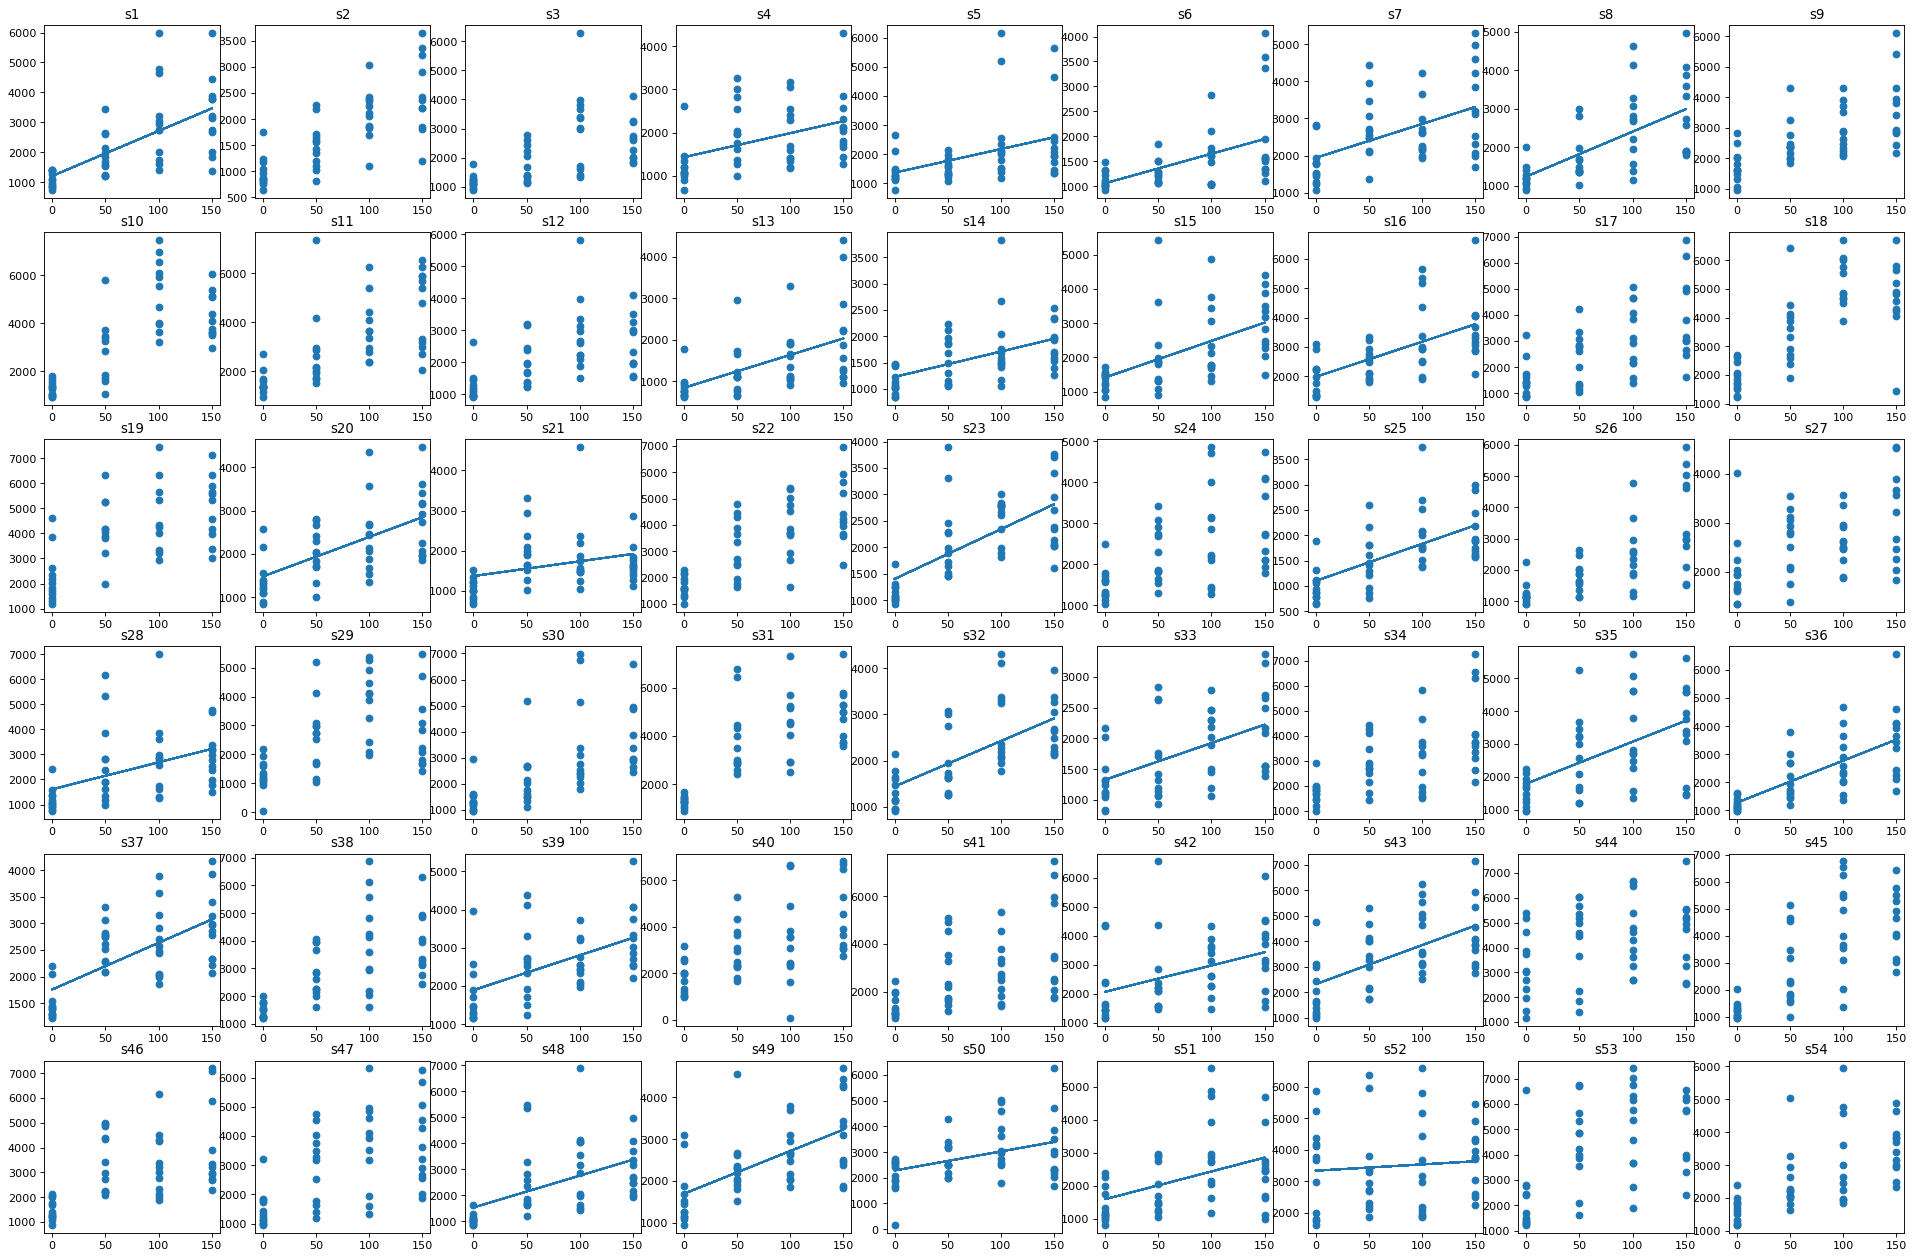

In [172]:
fig = plt.figure(figsize=(30, 20), dpi= 80, facecolor='w', edgecolor='k')
new = []
# Loop over the subjects
for s in range(0,nsubject):
    
    # Specify the file name of the subject in question
    fn_in = 'data-mental-rotation/sub'+str(s+1)

    # Read in experimental data
    with open(fn_in+'.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
        stimuli, rt, angle, acc, ind_stimuli = pickle.load(f)
        
    # Focus on trials where stimulus pair is matched
    inds= np.where(ind_stimuli==0)
    
    # Record the reaction time (rt) for each trial in a vector
    rt = np.float32(rt[inds])
    # Record the angle of the object pair for each trial in a vector
    angle = np.float32(angle[inds])
    
    
    #========== Your solution begins here ==========
    
    # Task 1: Line fitting [3pts]
    
    #-------Task 1.1-------
    # Fit a line (linear regression) between reaction time (rt) and angle
    # i.e. rt = angle x slope + intercept

    fit2 = linregress(angle,rt)
    ang_coeff = fit2[0]
    intercept = fit2[1]
    fit_eq = (ang_coeff*angle) + intercept
    
    #-------Task 1.2-------
    # Record the slope for this subject in place-holder variable "slopes"
    slopes[s]= ang_coeff
    # Create a subplot for this subject
    plt.subplot(6,9,s+1)
    
    # Task 2: Within-subject visualization [2pts]
    
    #-------Task 2.1-------
    # Scatter plot reaction times (y-axis) against angles (x-axis)
    plt.scatter(angle, rt)

    #-------Task 2.2-------
    # Juxtapose the fitted line onto this scatter plot
    plt.plot(angle, fit_eq)
    
    # Specify title of the plot by subject index
    plt.title('s'+str(s+1))
        
    # Task 3: Within-subject statistics [1pt]
        
    #-------Task 3.1-------
    # Calculate within-subject mean response time across trials, for each angle
    trials = len(rt)
    d = {}
    means = {}
    for a in unique_angles:
        d[a] = []
        means[a] = None
    for a in unique_angles:
        for j in range(trials):
            if angle[j] == a:
                d[a].append(rt[j])
        means[a] = np.nanmean(d[a])
    mean_values = list(means.values())
    
    #-------Task 3.2-------
    # Record this value in place-holder variable "rt_matrix"
    new.append(mean_values)

rt_matrix = new


### Task 4: Across-subject visualization [2pts]

**Task 4.1**: Take the average of mean response times across subjects, for each angle.

In [173]:
# Write your code here.
final = [[],[],[],[]]
mean_responses = []
for j in range(len(rt_matrix)):
    for k in range(len(unique_angles)):
        final[k].append(rt_matrix[j][k])
    
for item in final:
    mean_responses.append(np.mean(item))
    
print(mean_responses)
        

[1537.9031, 2508.8503, 3120.9114, 3353.5706]


**Task 4.2**: Take the standard deviation of mean response times across subjects, for each angle.

In [174]:
# Write your code here.
stds = []
for item in final:
    stds.append(np.std(item))

print(stds)

[478.46774, 729.3648, 889.53125, 865.222]


**Task 4.3**: Plot the average and standard deviation values calculated above, against the four angles.

**Task 4.4**: Label both axes.

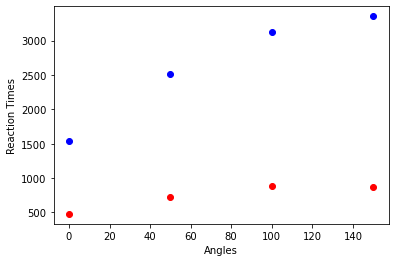

In [175]:
plt.figure()

# Write your code here.
plt.plot(unique_angles, mean_responses,"bo")
plt.plot(unique_angles, stds, "ro")
plt.xlabel("Angles")
plt.ylabel("Reaction Times")
plt.show()


### Task 5: Across-subject statistics [2pts]

**Task 5.1**: Plot a histogram of slopes (across subjects) from the line fits in **Tasks 1.1** and **1.2**.

**Task 5.2**: Label both axes.

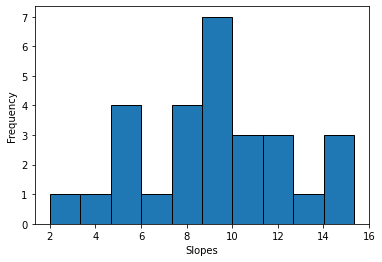

In [176]:
# Write your code here.
slopes = slopes[np.logical_not(np.isnan(slopes))]
plt.hist(slopes, edgecolor='black')
plt.xlabel("Slopes")
plt.ylabel("Frequency")

plt.show()

Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. Please follow the usual naming convention for **both** your Jupyter Notebook and PDF files: `lab3_writeup_YourStudentNumber.pdf`